In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams["figure.figsize"] = (15, 10)

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
cd '/content/drive/MyDrive/Fall 2021 Bootcamp/Bootcamp Teams/Weather Jackets/World AQI'

/content/drive/.shortcut-targets-by-id/1NbCMYiJC0r9SXkYY4h433WPB0D5cMw6f/Fall 2021 Bootcamp/Bootcamp Teams/Weather Jackets/World AQI


In [39]:
%ls

us-covid-19-airqualitydata-2020Q2.csv   waqi-covid19-airqualitydata-2019Q3.csv
waqi-covid19-airqualitydata-2015H1.csv  waqi-covid19-airqualitydata-2019Q4.csv
waqi-covid19-airqualitydata-2016H1.csv  waqi-covid19-airqualitydata-2020.csv
waqi-covid19-airqualitydata-2017H1.csv  waqi-covid19-airqualitydata-2020Q1.csv
waqi-covid19-airqualitydata-2018H1.csv  waqi-covid19-airqualitydata-2020Q2.csv
waqi-covid19-airqualitydata-2019Q1.csv  waqi-covid19-airqualitydata-2020Q3.csv
waqi-covid19-airqualitydata-2019Q2.csv  waqi-covid19-airqualitydata-2020Q4.csv


In [40]:
df = pd.read_csv('us-covid-19-airqualitydata-2020Q2.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

In [41]:
df = df.dropna(how='all')

In [79]:
df

,Date,Country,City,Specie,count,min,max,median,variance
0,4/29/20,US,Oklahoma City,o3,48,13.6,40.8,33.6,489.1
1,5/11/20,US,Oklahoma City,o3,58,24.1,45.6,31.2,235.51
2,5/12/20,US,Oklahoma City,o3,68,15.2,34.4,20.8,153.19
3,6/12/20,US,Oklahoma City,o3,72,1.6,46.5,30.4,1459.18
4,6/18/20,US,Oklahoma City,o3,70,13.6,53.3,41.6,737.92
...,...,...,...,...,...,...,...,...,...
54456,7/3/20,US,Fort Worth,humidity,24,39,94,54,3053.91
54457,3/31/20,US,Fort Worth,humidity,24,48,100,76,2625.05
54458,4/22/20,US,Fort Worth,humidity,24,23,93,65,3374.41
54459,4/29/20,US,Fort Worth,humidity,24,19,82,48,5279.55


In [80]:
dfco = df[df['Specie'] == 'co']

In [81]:
dfco

,Date,Country,City,Specie,count,min,max,median,variance
733,4/9/20,US,Oklahoma City,co,25,1.2,5.6,4.5,17.02
734,4/16/20,US,Oklahoma City,co,24,2.3,10,6.7,65.15
735,6/15/20,US,Oklahoma City,co,36,3.4,14.5,10,134.73
736,5/8/20,US,Oklahoma City,co,25,2.3,7.8,5.6,39
737,5/17/20,US,Oklahoma City,co,19,3.4,8.9,4.5,37.72
...,...,...,...,...,...,...,...,...,...
53113,4/29/20,US,Tallahassee,co,44,1.7,2,1.8,0.08
53114,5/1/20,US,Tallahassee,co,48,1.5,1.8,1.6,0.07
53115,5/3/20,US,Tallahassee,co,48,1.7,1.9,1.8,0.07
53116,6/7/20,US,Tallahassee,co,46,1,1.3,1.2,0.04


In [82]:
dfco = dfco.drop(['min', 'max', 'variance', 'Country', 'Specie', 'count'], axis = 1)

In [74]:
dfco

,Date,City,median
733,4/9/20,Oklahoma City,4.5
734,4/16/20,Oklahoma City,6.7
735,6/15/20,Oklahoma City,10
736,5/8/20,Oklahoma City,5.6
737,5/17/20,Oklahoma City,4.5
...,...,...,...
53113,4/29/20,Tallahassee,1.8
53114,5/1/20,Tallahassee,1.6
53115,5/3/20,Tallahassee,1.8
53116,6/7/20,Tallahassee,1.2


In [96]:
dfatlantaco = dfco[dfco['City'] == 'Atlanta']

In [97]:
dfatlantaco = dfatlantaco.sort_values(by='Date')

In [98]:
dfatlantaco = dfatlantaco.drop(['City'], axis = 1)
dfatlantaco

,Date,median
18729,3/30/20,2.2
18736,3/31/20,1.9
18717,4/1/20,2.3
18730,4/10/20,1.7
18761,4/11/20,3.5
...,...,...
18773,7/1/20,2.2
18691,7/2/20,2.9
18684,7/3/20,3.2
18696,7/4/20,5


In [99]:
dfatlantaco['Date'] = pd.to_datetime(dfatlantaco['Date'])
#dfatlantaco = dfatlantaco.drop(['Date'], axis = 1)
dfatlantaco

,Date,median
18729,2020-03-30,2.2
18736,2020-03-31,1.9
18717,2020-04-01,2.3
18730,2020-04-10,1.7
18761,2020-04-11,3.5
...,...,...
18773,2020-07-01,2.2
18691,2020-07-02,2.9
18684,2020-07-03,3.2
18696,2020-07-04,5


In [103]:
dfatlantaco['X'] = np.arange(len(dfatlantaco))
dfatlantaco

,Date,median,X
18729,2020-03-30,2.2,0
18736,2020-03-31,1.9,1
18717,2020-04-01,2.3,2
18730,2020-04-10,1.7,3
18761,2020-04-11,3.5,4
...,...,...,...
18773,2020-07-01,2.2,93
18691,2020-07-02,2.9,94
18684,2020-07-03,3.2,95
18696,2020-07-04,5,96


In [116]:
dfatlantaco["median"] = pd.to_numeric(dfatlantaco["median"], downcast="float")
dfatlantaco

,Date,median,X
18729,2020-03-30,2.2,0
18736,2020-03-31,1.9,1
18717,2020-04-01,2.3,2
18730,2020-04-10,1.7,3
18761,2020-04-11,3.5,4
...,...,...,...
18773,2020-07-01,2.2,93
18691,2020-07-02,2.9,94
18684,2020-07-03,3.2,95
18696,2020-07-04,5.0,96


Text(0.5, 1.0, 'Atlanta CO levels between March 30, 2020 to July 05, 2020')

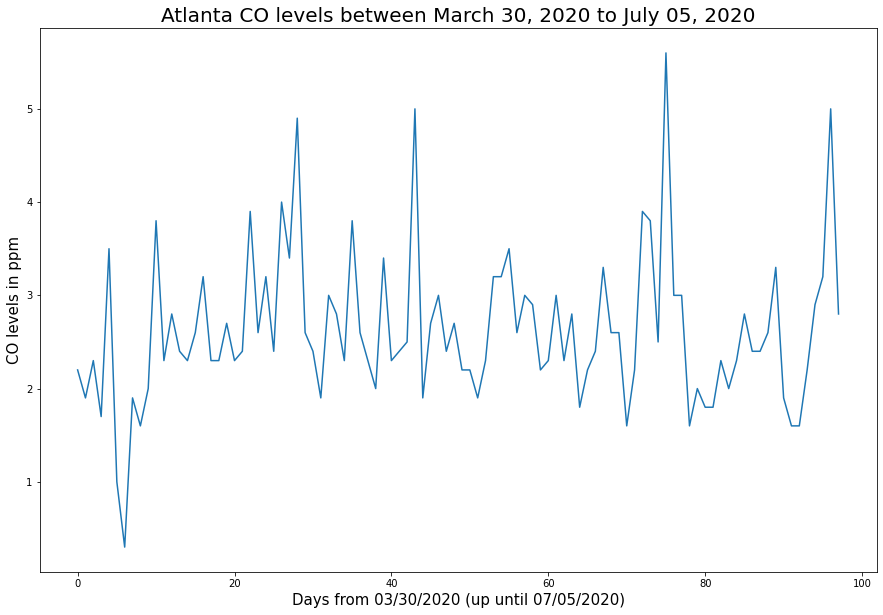

In [128]:
plt.plot(dfatlantaco['X'], dfatlantaco['median'])
plt.xlabel('Days from 03/30/2020 (up until 07/05/2020)', fontsize="15")
plt.ylabel('CO levels in ppm', fontsize="15")
plt.title('Atlanta CO levels between March 30, 2020 to July 05, 2020', fontsize="20")